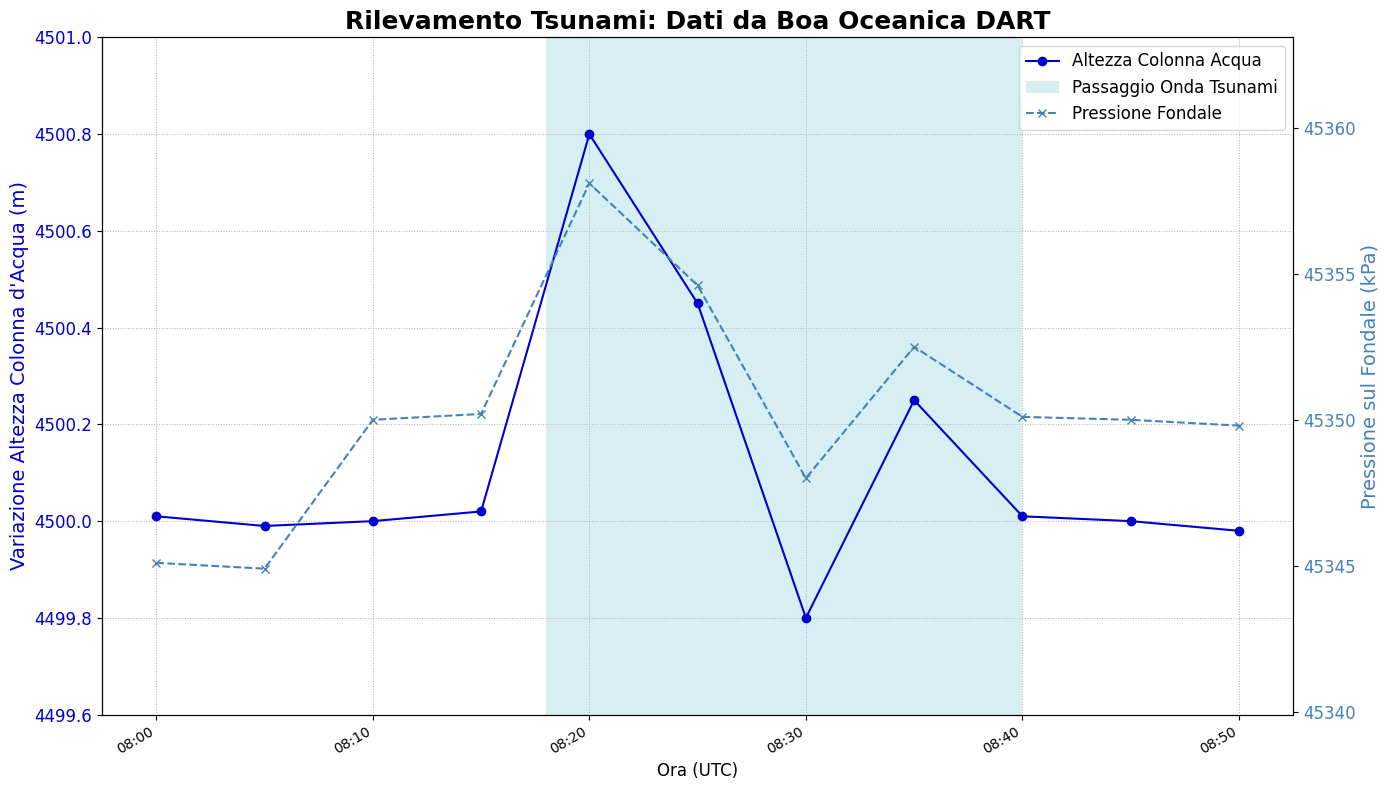

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

try:
    df = pd.read_csv("..\\Data\\tsunami_dart_buoy_data.csv")
except FileNotFoundError:
    print("Errore: File 'tsunami_dart_buoy_data.csv' non trovato.")
    exit()

df['timestamp'] = pd.to_datetime(df['timestamp'])

fig, ax1 = plt.subplots(figsize=(14, 8))

color1 = 'mediumblue'
color2 = 'steelblue'

ax1.set_title("Rilevamento Tsunami: Dati da Boa Oceanica DART", fontsize=18, fontweight='bold')

ax1.set_xlabel('Ora (UTC)', fontsize=12)
ax1.set_ylabel('Variazione Altezza Colonna d\'Acqua (m)', color=color1, fontsize=14)
ax1.plot(df['timestamp'], df['water_column_height_m'], color=color1, marker='o', linestyle='-', label='Altezza Colonna Acqua')
ax1.tick_params(axis='y', labelcolor=color1, labelsize=12)
ax1.grid(True, which='major', linestyle=':', linewidth=0.7)

ax1.set_ylim(df['water_column_height_m'].min() - 0.2, df['water_column_height_m'].max() + 0.2)

tsunami_start = pd.to_datetime('2025-12-26T08:18:00Z')
tsunami_end = pd.to_datetime('2025-12-26T08:40:00Z')
ax1.axvspan(tsunami_start, tsunami_end, color='powderblue', alpha=0.5, lw=0, label='Passaggio Onda Tsunami')

ax2 = ax1.twinx()
ax2.set_ylabel('Pressione sul Fondale (kPa)', color=color2, fontsize=14)
ax2.plot(df['timestamp'], df['bottom_pressure_kpa'], color=color2, marker='x', linestyle='--', label='Pressione Fondale')
ax2.tick_params(axis='y', labelcolor=color2, labelsize=12)
ax2.set_ylim(df['bottom_pressure_kpa'].min() - 5, df['bottom_pressure_kpa'].max() + 5)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=12)

fig.autofmt_xdate(rotation=30)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()

plt.savefig('grafico_tsunami_boa_blu.png', dpi=300)
plt.show()